<a href="https://colab.research.google.com/github/ShaunakSen/Data-Science-and-Machine-Learning/blob/master/Similarity_in_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Four ways to quantify synchrony between time series data

[article by Jin Hyun Cheong](https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9)

### 1. Pearson correlation — simple is best

The Pearson correlation measures how two continuous signals co-vary over time and indicate the linear relationship as a number between -1 (negatively correlated) to 0 (not correlated) to 1 (perfectly correlated). It is intuitive, easy to understand, and easy to interpret.

Two things to be cautious when using Pearson correlation is that:

1. outliers can skew the results of the correlation estimation

2. it assumes the data are homoscedastic such that the variance of your data is homogenous across the data range. The assumption of homoscedasticity (meaning “same variance”) is central to linear regression models.  Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables. 


**Generally, the correlation is a snapshot measure of global synchrony. Therefore it does not provide information about directionality between the two signals such as which signal leads and which follows.**

The Pearson correlation is implemented in multiple packages including Numpy, Scipy, and Pandas. If you have null or missing values in your data, correlation function in Pandas will drop those rows before computing whereas you need to manually remove those data if using Numpy or Scipy’s implementations.

The following code loads are sample data (in the same folder), computes the Pearson correlation using Pandas and Scipy and plots the median filtered data.



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv('./synchrony_sample.csv')

df.head()

,S1_Joy,S2_Joy
0,1.662181,0.611217
1,1.584762,0.697876
2,1.413029,1.198360
3,1.995480,0.950441
4,1.981835,0.669841


In [5]:
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

Pandas computed Pearson r: 0.2058774513561943


In [9]:
df.rolling(window=30, center=True).median().head(20)

,S1_Joy,S2_Joy
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


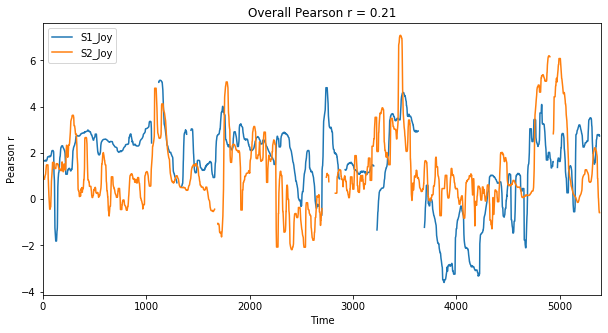

In [11]:
# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(10,5))
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Once again, the Overall Pearson r is a measure of global synchrony that reduces the relationship between two signals to a single value. Nonetheless there is a way to look at moment-to-moment, local synchrony, using Pearson correlation. One way to compute this is by measuring the Pearson correlation in a small portion of the signal, and repeat the process along a rolling window until the entire signal is covered. This can be somewhat subjective as it requires arbitrarily defining the window size you’d like to repeat the procedure. In the code below we use a window size of 120 frames (~4 seconds) and plot the moment-to-moment synchrony in the bottom figure.

In [13]:
# Set window size to compute moving window synchrony.
r_window_size = 120
# Interpolate missing data.
df_interpolated = df.interpolate()

df_interpolated.head()

,S1_Joy,S2_Joy
0,1.662181,0.611217
1,1.584762,0.697876
2,1.413029,1.198360
3,1.995480,0.950441
4,1.981835,0.669841
